<a href="https://colab.research.google.com/github/TechMavenTanishka/Basic-Programs/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
data=pd.read_csv('/content/NFLX.csv')
data[0:3]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500


In [ ]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data['Date'],y=data['Open'].rolling(window=14).mean(),name="netflix"),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text="NETFLIX")
fig.update_xaxes(title_text="year")
fig.update_yaxes(title_text="prices",secondary_y=False)
fig.show()

In [ ]:
n=len(data)
train_data=data[0:(n//10)*9]
test_data=data[(n//10)*9:]

In [ ]:
test_data[0:3]

,Date,Open,High,Low,Close,Adj Close,Volume
900,2021-09-01,569.000000,591.000000,569.000000,582.070007,582.070007,5626200
901,2021-09-02,583.679993,598.760010,583.679993,588.549988,588.549988,6179900
902,2021-09-03,585.799988,591.880005,583.140015,590.530029,590.530029,2681200


In [ ]:
print(len(train_data))
print(len(test_data))

900
109


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data['Open'].values.reshape(-1,1))

In [ ]:
prediction_days = 30

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)-10):      ######
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+10, 0])      ###### predict 10 days after

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
print(x_train.shape)
print(y_train.shape)

(860, 30, 1)
(860,)


In [ ]:
def LSTM_model():

    model = Sequential()
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    return model

In [ ]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 1, save_best_only = True)
his=model.fit(x_train,y_train,epochs=20,batch_size=32,callbacks=[checkpointer])

Epoch 1/20
27/27 [==============================] - ETA: 0s - loss: 0.0809 - accuracy: 0.0023

27/27 [==============================] - 9s 86ms/step - loss: 0.0809 - accuracy: 0.0023
Epoch 2/20
26/27 [===========================>..] - ETA: 0s - loss: 0.0144 - accuracy: 0.0024

27/27 [==============================] - 2s 78ms/step - loss: 0.0143 - accuracy: 0.0023
Epoch 3/20
27/27 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.0023

27/27 [==============================] - 1s 53ms/step - loss: 0.0118 - accuracy: 0.0023
Epoch 4/20
27/27 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.0023

27/27 [==============================] - 1s 52ms/step - loss: 0.0122 - accuracy: 0.0023
Epoch 5/20
27/27 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.0023

27/27 [==============================] - 1s 53ms/step - loss: 0.0118 - accuracy: 0.0023
Epoch 6/20
27/27 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.0023

27/27 [==============================] - 1s 54ms/step - loss: 0.0133 - accuracy: 0.0023
Epoch 7/20
27/27 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.0023

27/27 [==============================] - 2s 70ms/step - loss: 0.0120 - accuracy: 0.0023
Epoch 8/20
27/27 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.0023

27/27 [==============================] - 2s 75ms/step - loss: 0.0117 - accuracy: 0.0023
Epoch 9/20
27/27 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.0023

27/27 [==============================] - 4s 145ms/step - loss: 0.0113 - accuracy: 0.0023
Epoch 10/20
27/27 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.0023

27/27 [==============================] - 3s 117ms/step - loss: 0.0110 - accuracy: 0.0023
Epoch 11/20
27/27 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.0023

27/27 [==============================] - 3s 118ms/step - loss: 0.0113 - accuracy: 0.0023
Epoch 12/20
27/27 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.0023

27/27 [==============================] - 3s 99ms/step - loss: 0.0111 - accuracy: 0.0023
Epoch 13/20
27/27 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.0023

27/27 [==============================] - 3s 123ms/step - loss: 0.0106 - accuracy: 0.0023
Epoch 14/20
27/27 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.0023

27/27 [==============================] - 5s 175ms/step - loss: 0.0109 - accuracy: 0.0023
Epoch 15/20
27/27 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.0023

27/27 [==============================] - 3s 101ms/step - loss: 0.0105 - accuracy: 0.0023
Epoch 16/20
27/27 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.0023

27/27 [==============================] - 2s 72ms/step - loss: 0.0123 - accuracy: 0.0023
Epoch 17/20
26/27 [===========================>..] - ETA: 0s - loss: 0.0097 - accuracy: 0.0024

27/27 [==============================] - 1s 54ms/step - loss: 0.0097 - accuracy: 0.0023
Epoch 18/20
26/27 [===========================>..] - ETA: 0s - loss: 0.0107 - accuracy: 0.0024

27/27 [==============================] - 1s 52ms/step - loss: 0.0106 - accuracy: 0.0023
Epoch 19/20
26/27 [===========================>..] - ETA: 0s - loss: 0.0105 - accuracy: 0.0024

27/27 [==============================] - 1s 54ms/step - loss: 0.0103 - accuracy: 0.0023
Epoch 20/20
27/27 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.0023

27/27 [==============================] - 1s 55ms/step - loss: 0.0105 - accuracy: 0.0023


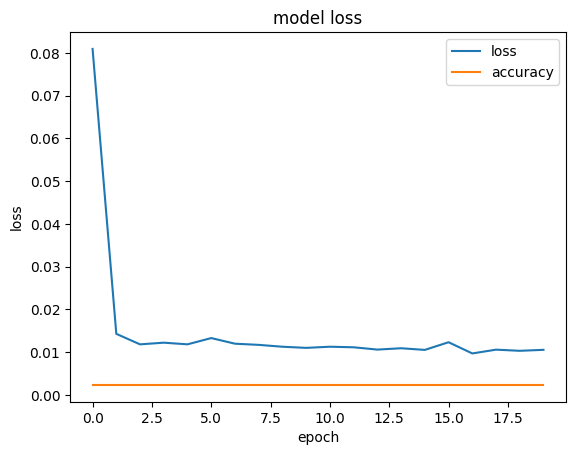

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','accuracy'], loc='upper right')
plt.show()

In [ ]:
actual_prices = test_data['Open'].values
total_dataset = pd.concat((train_data['Open'], test_data['Open']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
x_test = []
for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


4/4 [==============================] - 4s 44ms/step


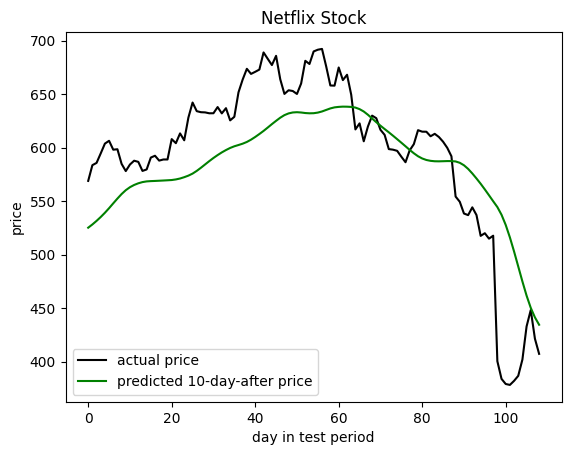

In [ ]:
plt.plot(actual_prices, color='black', label=f"actual price")
plt.plot(predicted_prices, color= 'green', label=f"predicted 10-day-after price")
plt.title(f"Netflix Stock")
plt.xlabel("day in test period")
plt.ylabel(f"price")
plt.legend()
plt.show()

In [ ]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))
print(real_data.shape)

(1, 29, 1)


In [ ]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"prediction: {prediction[0][0]}")

1/1 [==============================] - 0s 32ms/step
prediction: 429.0715026855469
